In [2]:
import h5py
import scipy.io as scio
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap as bmp

# Phase Example

In [3]:
data = scio.loadmat('./example_phase.mat')
tmp_smt = data['tmp_smt'][:]
tmp_ac = data['tmp_ac'][:]
tmp_anm1 = data['tmp_anm1'][:]
tmp_anm2 = data['tmp_anm2'][:]

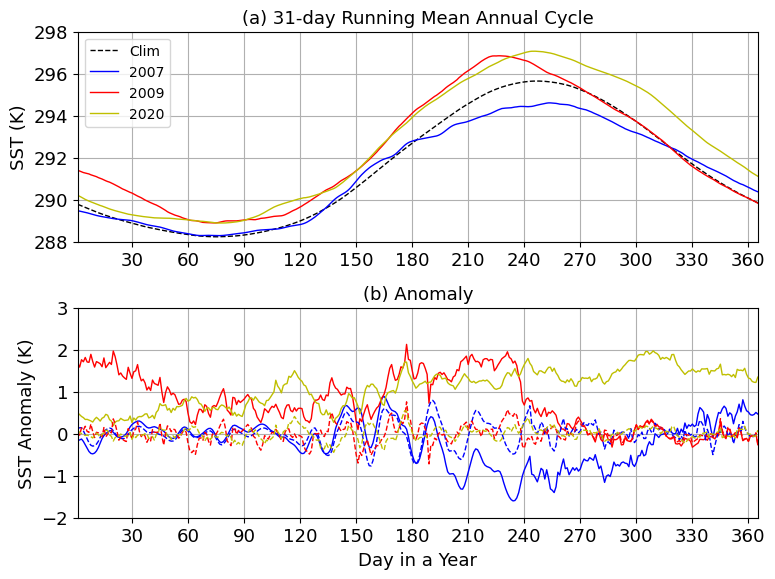

In [4]:
plt_pos=np.zeros((2,4))
plt_pos[0,0]=.1
plt_pos[1,0]=.1
plt_pos[0,1]=.58
plt_pos[1,1]=.12
plt_pos[0,2]=.85
plt_pos[1,2]=.85
plt_pos[0,3]=.35
plt_pos[1,3]=.35

fig2 = plt.figure(figsize=[8,6])

ax1 = plt.axes(plt_pos[0,:])
lns1 = plt.plot(tmp_ac[:,1],tmp_ac[:,0],c='k',ls='--',lw=1,label='Clim')
lns2 = plt.plot(tmp_ac[:,1],tmp_smt[:,0],c='b',lw=1,label='2007')
lns3 = plt.plot(tmp_ac[:,1],tmp_smt[:,1],c='r',lw=1,label='2009')
lns4 = plt.plot(tmp_ac[:,1],tmp_smt[:,2],c='y',lw=1,label='2020')
ax1.set_xticks(ticks=np.arange(30,365,30))
ax1.set_xlim(1,365)
ax1.set_yticks(ticks=np.arange(270,300,2))
ax1.set_ylim(288,298)
ax1.set_ylabel('SST (K)',fontsize=13)
ax1.tick_params(axis='y',labelsize=13)
ax1.tick_params(axis='x',labelsize=13)
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0)
ax1.grid()
plt.title('(a) 31-day Running Mean Annual Cycle',fontsize=13)

ax1 = plt.axes(plt_pos[1,:])
plt.plot(tmp_ac[:,1],tmp_anm1[:,0],c='b',lw=1)
plt.plot(tmp_ac[:,1],tmp_anm1[:,1],c='r',lw=1)
plt.plot(tmp_ac[:,1],tmp_anm1[:,2],c='y',lw=1)
plt.plot(tmp_ac[:,1],tmp_anm2[:,0],'--b',lw=1)
plt.plot(tmp_ac[:,1],tmp_anm2[:,1],'--r',lw=1)
plt.plot(tmp_ac[:,1],tmp_anm2[:,2],'--y',lw=1)
ax1.set_xticks(ticks=np.arange(30,365,30))
ax1.set_xlim(1,365)
ax1.set_xlabel('Day in a Year',fontsize=13)
ax1.set_yticks(ticks=np.arange(-10,10,1))
ax1.set_ylim(-2,3)
ax1.set_ylabel('SST Anomaly (K)',fontsize=13)
ax1.tick_params(axis='y',labelsize=13)
ax1.tick_params(axis='x',labelsize=13)
ax1.grid()
plt.title('(b) Anomaly',fontsize=13)

plt.show()
fig2.savefig('example_phase.pdf',dpi=200)

# Running Correlation

In [42]:
data = scio.loadmat('./example_rc.mat')
tmp_era = data['tmp_era'][:]
tmp_ac = data['tmp_ac'][:]
ps1 = data['ps1'][:]
ps2 = data['ps2'][:]
ps3 = data['ps3'][:]

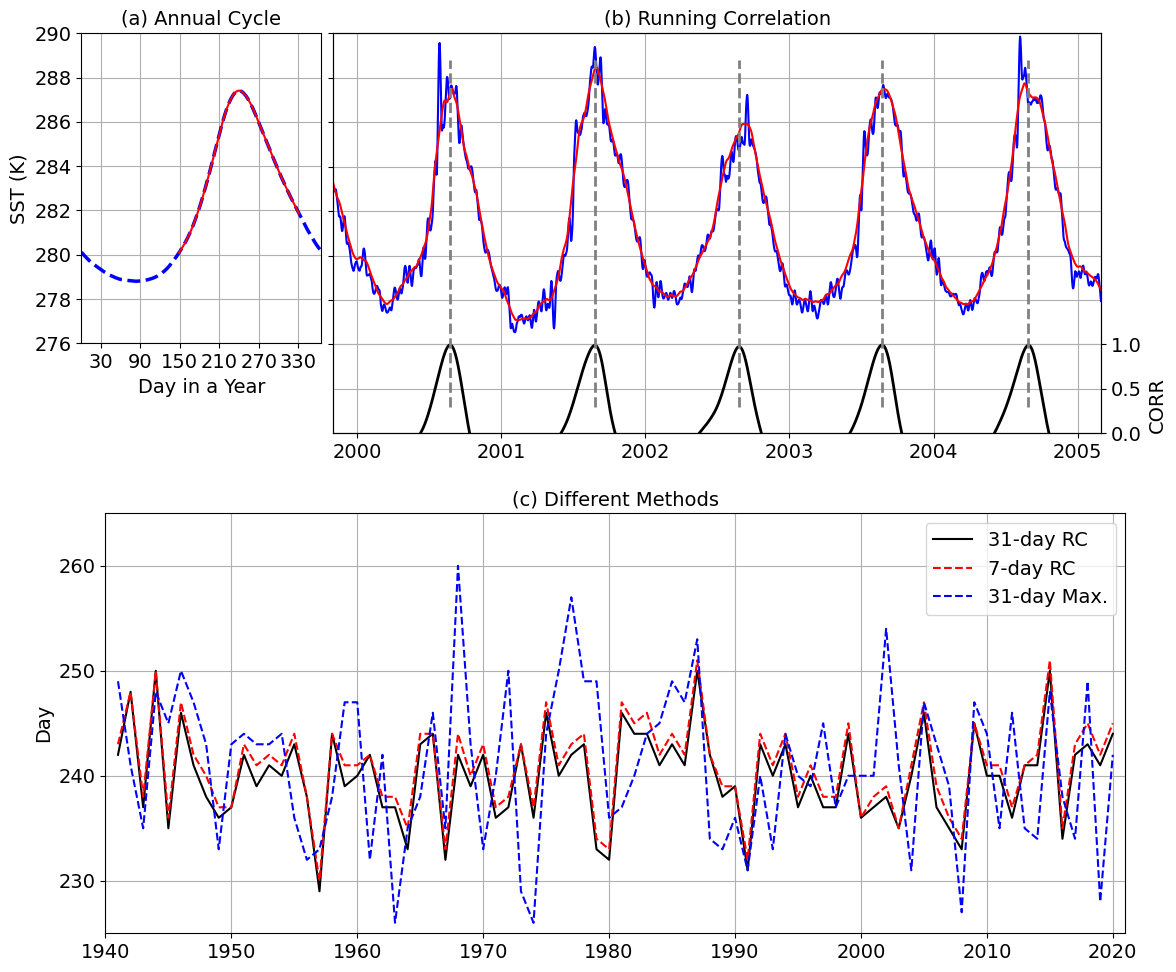

In [50]:
plt_pos=np.zeros((3,4))
plt_pos[:,0]=[.08,.29,.1]
plt_pos[:,1]=[.64,.55,.05]
plt_pos[:,2]=[.2,.64,.85]
plt_pos[:,3]=[.31,.4,.42]

fig2 = plt.figure(figsize=[12,10])

ax1 = plt.axes(plt_pos[0,:])
plt.plot(tmp_ac[:,2],tmp_ac[:,0],c='b',ls='--',lw=2.5)
plt.plot(tmp_ac[:,2],tmp_ac[:,1],c='r',lw=1.5)
ax1.set_xticks(np.arange(30,365,60),np.arange(30,365,60),fontsize=14)
ax1.set_xlim(1,365)
ax1.set_xlabel('Day in a Year',fontsize=14)
ax1.set_yticks(np.arange(270,300,2),np.arange(270,300,2),fontsize=14)
ax1.set_ylim(276,290)
ax1.set_ylabel('SST (K)',fontsize=14)
ax1.grid()
plt.title('(a) Annual Cycle',fontsize=14)

ax1 = plt.axes(plt_pos[1,:])
plt.plot(tmp_era[:,3],tmp_era[:,0],c='b')
plt.plot(tmp_era[:,3],tmp_era[:,1],c='r')
ax1.set_xticks(np.arange(0,365*82,365),np.arange(1940,2022,1),fontsize=14)
ax1.set_xlim(365*60-60,365*65+60)
ax1.set_yticks(np.arange(276,300,2),[])
ax1.set_ylim(272,290)
ax1.grid()
ax2 = ax1.twinx()
plt.plot(tmp_era[:,3],tmp_era[:,2],c='k',lw=2.0)
plt.vlines(ps2[:,1],.3,4.2,color='grey',linestyle='--',lw=2.0)
ax2.set_yticks(np.arange(-1,1.5,.5),np.arange(-1,1.5,.5),fontsize=14)
ax2.set_ylim(0,4.5)
ax2.set_ylabel('CORR',loc='bottom',fontsize=14)
ax2.grid()
plt.title('(b) Running Correlation',fontsize=14)

ax1 = plt.axes(plt_pos[2,:])
lns1 = plt.plot(np.arange(1941,2021,1),ps2[:,0],c='k',label='31-day RC')
lns2 = plt.plot(np.arange(1941,2021,1),ps3,c='r',ls='--',label='7-day RC')
lns3 = plt.plot(np.arange(1941,2021,1),ps1,c='b',ls='--',label='31-day Max.')
ax1.set_xticks(np.arange(1900,2030,10),np.arange(1900,2030,10),fontsize=14)
ax1.set_xlim(1940,2021)
ax1.set_yticks(np.arange(200,300,10),np.arange(200,300,10),fontsize=14)
ax1.set_ylim(225,265)
ax1.set_ylabel('Day',fontsize=14)
ax1.grid()
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=1,fontsize=14)
plt.title('(c) Different Methods',fontsize=14)

plt.show()
fig2.savefig('example_rc.pdf',dpi=200)

# Mean State of ERA5 SST Phase

In [53]:
data = scio.loadmat('./mn_ps.mat')
mn_ps = data['mn_ps'][:]
std_ps = data['std_ps'][:]
lon = data['lon'][:]
lat = data['lat'][:]

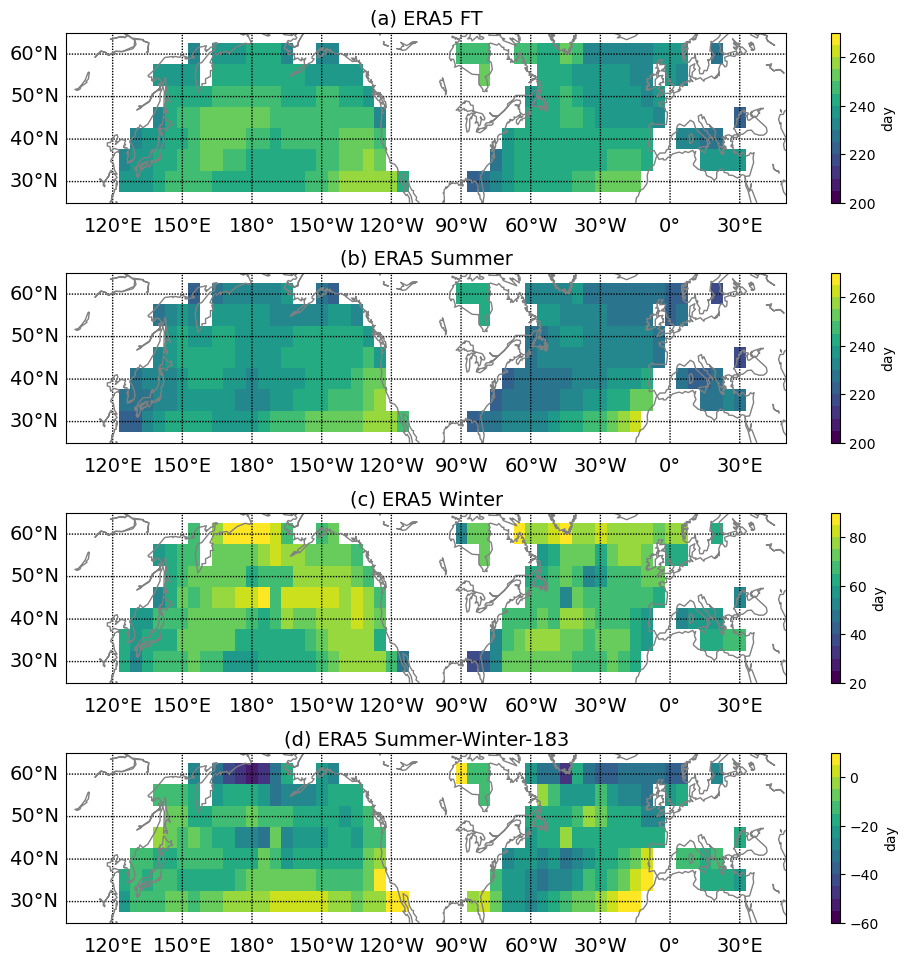

In [62]:
#lev1 = np.hstack((np.arange(-.8,-.1,.1),np.arange(.2,.9,.1)))
lev1 = np.arange(-1.2,1.4,.2)
vv = np.array([[200,270],[200,270],[20,90],[-60,10]])
cmap = cm.get_cmap('viridis',14)
colors_cool = cmap(np.arange(0,14,1))
colors_all = colors_cool
#colors_all = np.vstack((colors_cool[0:5,:],[1.,1.,1.,1.],[1.,1.,1.,1.], \
#                        colors_cool[5:10,:]))
cmap_merged = mcolors.ListedColormap(colors_all)
cmap_merged.set_bad('white',1.)
plt_pos=np.zeros((4,4))
plt_pos[0:4,0]=.1
plt_pos[0:4,1]=np.arange(.78,0,-.24)
plt_pos[:,2]=.9
plt_pos[:,3]=.17
title_str=['(a) ERA5 FT','(b) ERA5 Summer', \
           '(c) ERA5 Winter','(d) ERA5 Summer-Winter-183']

fig2 = plt.figure(figsize=[10,10])

for m in range(0,4):
    
    ax1 = plt.axes(plt_pos[m,:])
    as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
    as1.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0],fontsize=14)
    as1.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1],fontsize=14)
    as1.drawcoastlines(linewidth=1.0,color='grey')
    extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
    cf1 = ax1.imshow(np.transpose(mn_ps[:,:,m]),extent=extent, \
                    vmin=vv[m,0],vmax=vv[m,1],cmap=cmap_merged,aspect='auto')
    plt.title(title_str[m],fontsize=14)
    colorbar = plt.colorbar(cf1,label='day')

plt.show()
fig2.savefig('mn_ps.eps',dpi=200)

# Trends of SST Phase

In [21]:
data = scio.loadmat('./trd_ps_2.mat')
trd_ps = data['trd_ps'][:]
corr_ps = data['corr_ps'][:]
test05 = data['test05'][:]
test01 = data['test01'][:]
lon = data['lon'][:]
lat = data['lat'][:]

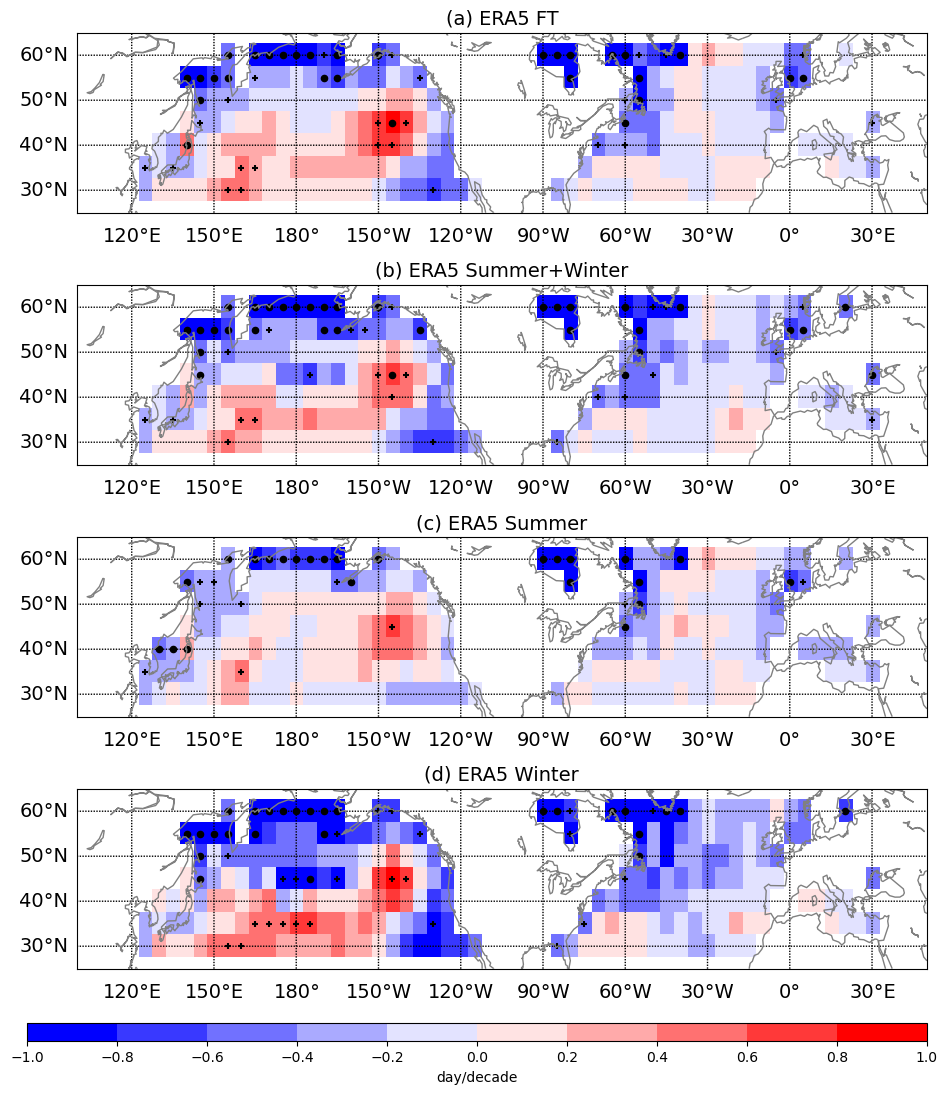

In [22]:
#lev1 = np.hstack((np.arange(-.8,-.1,.1),np.arange(.2,.9,.1)))
lev1 = np.arange(-1.2,1.4,.2)
cmap = cm.get_cmap('bwr',10)
colors_cool = cmap(np.arange(0,10,1))
colors_all = colors_cool
#colors_all = np.vstack((colors_cool[0:5,:],[1.,1.,1.,1.],[1.,1.,1.,1.], \
#                        colors_cool[5:10,:]))
cmap_merged = mcolors.ListedColormap(colors_all)
cmap_merged.set_bad('white',1.)
plt_pos=np.zeros((4,4))
plt_pos[0:2,0]=.1
plt_pos[2:4,0]=.1
plt_pos[0:4,1]=np.arange(.76,0,-.21)
plt_pos[:,2]=.85
plt_pos[:,3]=.15
title_str=['(a) ERA5 FT','(b) ERA5 Summer+Winter', \
           '(c) ERA5 Summer','(d) ERA5 Winter']

fig2 = plt.figure(figsize=[10,12])

for m in range(0,4):

    ax1 = plt.axes(plt_pos[m,:])
    as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
    as1.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=14)
    as1.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1], fontsize=14)
    as1.drawcoastlines(linewidth=1.0,color='grey')
    extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
    cf1 = ax1.imshow(10*np.transpose(trd_ps[:,:,m+4]),extent=extent,
                     vmin=-1.0,vmax=1.0,cmap=cmap_merged,aspect='auto')
    plt.scatter(test05[:,m+4,0],test05[:,m+4,1],s=20,c='k',marker='+')
    plt.scatter(test01[:,m+4,0],test01[:,m+4,1],s=20,c='k',marker='o')
    plt.title(title_str[m],fontsize=14)

clb_pos = fig2.add_axes([.05, .07, .9, .015])
cb = fig2.colorbar(cf1,cax=clb_pos,orientation='horizontal', \
                   ticks=lev1,label='day/decade')
#fig2.suptitle('Trend of SST Phase 1959-2021')

plt.show()
fig2.savefig('trd_ps_era.eps',dpi=200)

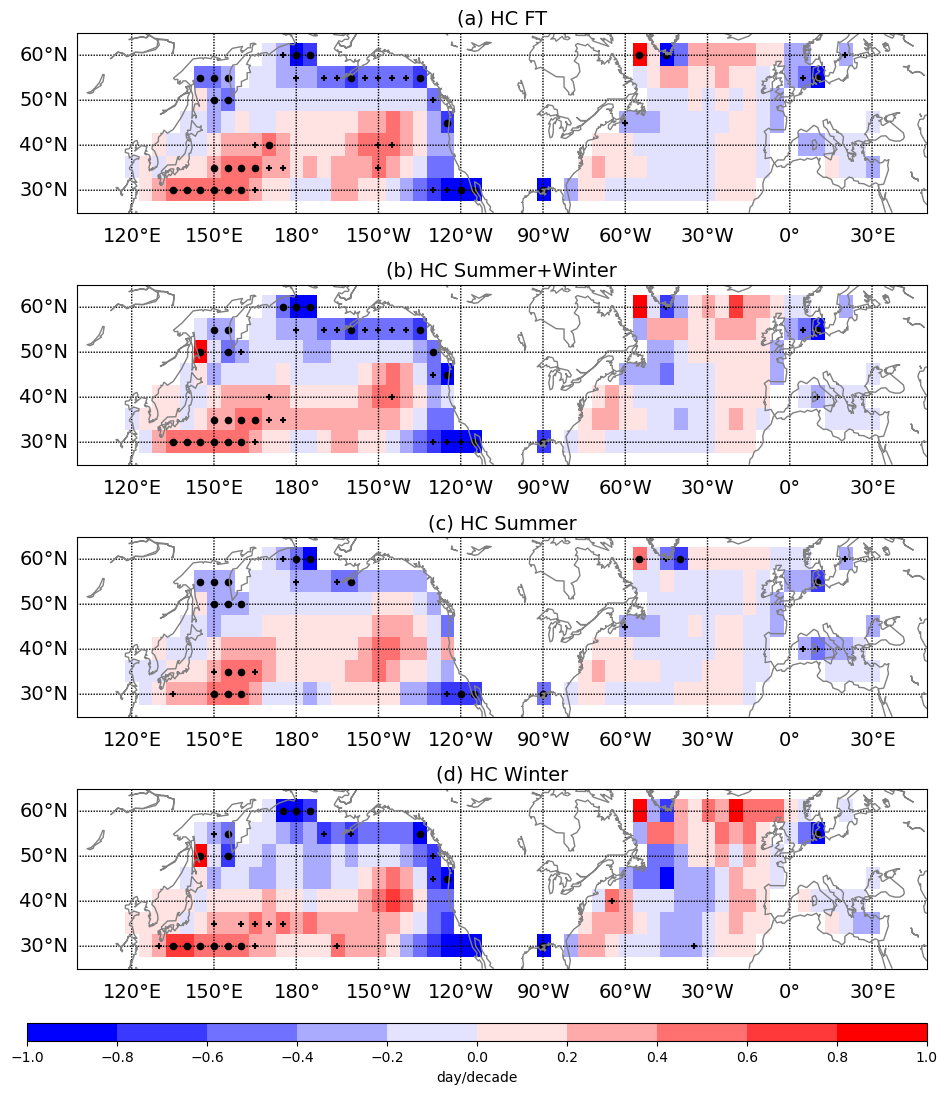

In [24]:
#lev1 = np.hstack((np.arange(-.8,-.1,.1),np.arange(.2,.9,.1)))
lev1 = np.arange(-1.2,1.4,.2)
cmap = cm.get_cmap('bwr',10)
colors_cool = cmap(np.arange(0,10,1))
colors_all = colors_cool
#colors_all = np.vstack((colors_cool[0:5,:],[1.,1.,1.,1.],[1.,1.,1.,1.], \
#                        colors_cool[5:10,:]))
cmap_merged = mcolors.ListedColormap(colors_all)
cmap_merged.set_bad('white',1.)
plt_pos=np.zeros((4,4))
plt_pos[0:2,0]=.1
plt_pos[2:4,0]=.1
plt_pos[0:4,1]=np.arange(.76,0,-.21)
plt_pos[:,2]=.85
plt_pos[:,3]=.15
title_str=['(a) HC FT','(b) HC Summer+Winter', \
           '(c) HC Summer','(d) HC Winter']

fig2 = plt.figure(figsize=[10,12])

for m in range(0,4):

    ax1 = plt.axes(plt_pos[m,:])
    as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
    as1.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=14)
    as1.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1], fontsize=14)
    as1.drawcoastlines(linewidth=1.0,color='grey')
    extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
    cf1 = ax1.imshow(10*np.transpose(trd_ps[:,:,m]),extent=extent,
                     vmin=-1.0,vmax=1.0,cmap=cmap_merged,aspect='auto')
    plt.scatter(test05[:,m,0],test05[:,m,1],s=20,c='k',marker='+')
    plt.scatter(test01[:,m,0],test01[:,m,1],s=20,c='k',marker='o')
    plt.title(title_str[m],fontsize=14)

clb_pos = fig2.add_axes([.05, .07, .9, .015])
cb = fig2.colorbar(cf1,cax=clb_pos,orientation='horizontal', \
                   ticks=lev1,label='day/decade')
#fig2.suptitle('Trend of SST Phase 1959-2021')

plt.show()
fig2.savefig('trd_ps_hc.eps',dpi=200)

# Decadal Trends

In [27]:
data = scio.loadmat('./trd_era_decadal.mat')
trd_ps = data['trd_ps'][:]
aa1 = data['aa1'][:]
test05 = data['test05'][:]
test01 = data['test01'][:]
lon = data['lon'][:]
lat = data['lat'][:]

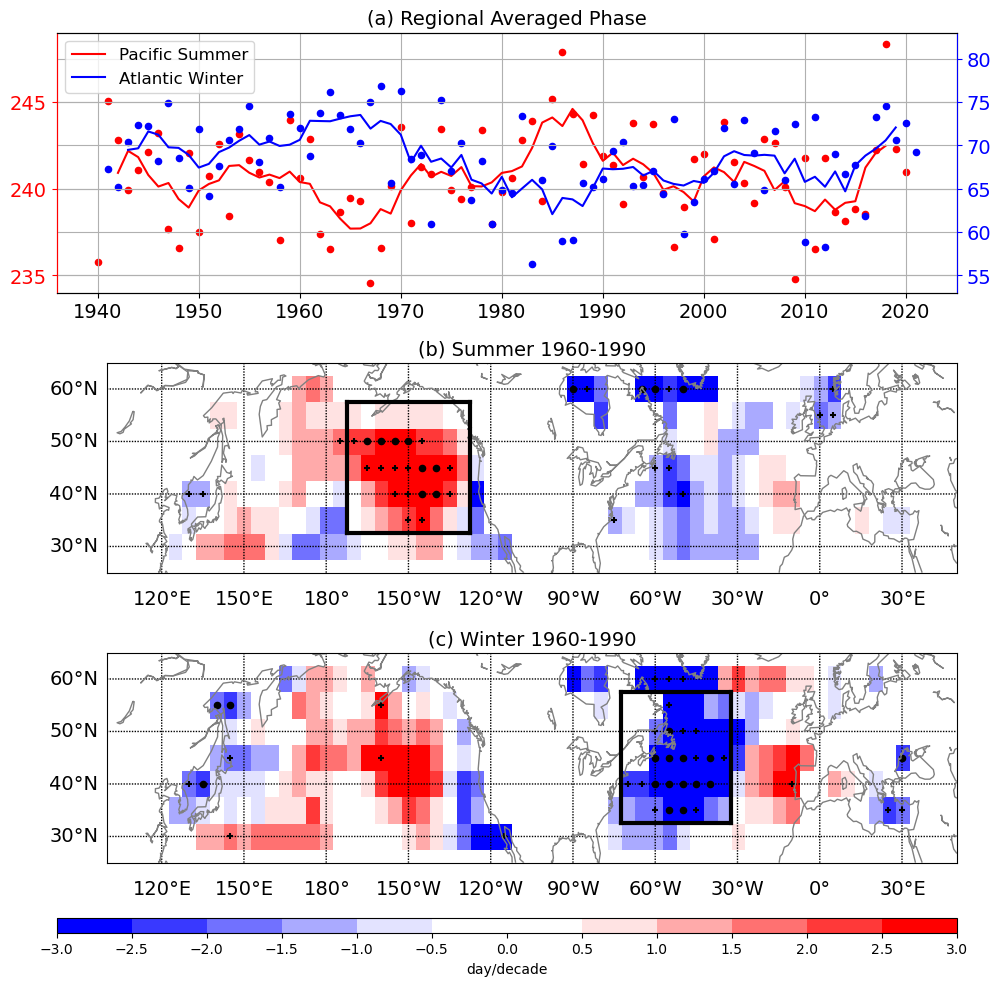

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [28]:
#lev1 = np.hstack((np.arange(-.8,-.1,.1),np.arange(.2,.9,.1)))
lev1 = np.arange(-3.0,3.5,.5)
cmap = cm.get_cmap('bwr',10)
colors_cool = cmap(np.arange(0,10,1))
#colors_all = colors_cool
colors_all = np.vstack((colors_cool[0:5,:],[1.,1.,1.,1.],[1.,1.,1.,1.], \
                        colors_cool[5:10,:]))
cmap_merged = mcolors.ListedColormap(colors_all)
cmap_merged.set_bad('white',1.)
plt_pos=np.zeros((3,4))
plt_pos[0,0]=.05
plt_pos[1:3,0]=.1
plt_pos[0,1]=.7
plt_pos[1,1]=.42
plt_pos[2,1]=.13
plt_pos[0,2]=.9
plt_pos[1:3,2]=.85
plt_pos[0,3]=.26
plt_pos[1:3,3]=.21

fig2 = plt.figure(figsize=[10,10])

ax1 = plt.axes(plt_pos[0,:])
plt.scatter(aa1[:,2,0],aa1[:,0,0],s=20,c='r',marker='o')
lns1 = plt.plot(aa1[:,2,1],aa1[:,0,1],c='r',label='Pacific Summer')
ax1.set_xticks(ticks=np.arange(1940,2030,10))
ax1.set_yticks(ticks=np.arange(235,255,5))
ax1.set_ylim(234,249)
ax1.tick_params(axis='y',labelsize=14,labelcolor='r',color='r')
ax1.spines['left'].set_color('r')
ax1.grid()
ax2 = ax1.twinx()
plt.scatter(aa1[:,2,0],aa1[:,1,0],s=20,c='b',marker='o')
lns2 = plt.plot(aa1[:,2,1],aa1[:,1,1],c='b',label='Atlantic Winter')
ax2.set_xticks(ticks=np.arange(1940,2030,10))
ax2.set_yticks(ticks=np.arange(55,90,5))
ax2.set_ylim(53,83)
ax2.tick_params(axis='y',labelsize=14,labelcolor='b',color='b')
ax1.tick_params(axis='x',labelsize=14)
ax2.spines['left'].set_color('r')
ax2.spines['right'].set_color('b')
ax2.grid()
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns,labs,loc=2,fontsize=12)
plt.title('(a) Regional Averaged Phase',fontsize=14)

ax1 = plt.axes(plt_pos[1,:])
as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
as1.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=14)
as1.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1], fontsize=14)
as1.drawcoastlines(linewidth=1.0,color='grey')
extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
cf1 = ax1.imshow(10*np.transpose(trd_ps[:,:,0,2]),extent=extent,
                vmin=-3.0,vmax=3.0,cmap=cmap_merged,aspect='auto')
plt.scatter(test05[:,0,2,0],test05[:,0,2,1],s=20,c='k',marker='+')
plt.scatter(test01[:,0,2,0],test01[:,0,2,1],s=20,c='k',marker='o')
plt.plot([187.5,187.5],[32.5,57.5],c='k',lw=3)
plt.plot([232.5,232.5],[32.5,57.5],c='k',lw=3)
plt.plot([187.5,232.5],[32.5,32.5],c='k',lw=3)
plt.plot([187.5,232.5],[57.5,57.5],c='k',lw=3)
plt.title('(b) Summer 1960-1990',fontsize=14)

ax1 = plt.axes(plt_pos[2,:])
as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
as1.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=14)
as1.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1], fontsize=14)
as1.drawcoastlines(linewidth=1.0,color='grey')
extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
cf1 = ax1.imshow(10*np.transpose(trd_ps[:,:,1,2]),extent=extent,
                vmin=-3.0,vmax=3.0,cmap=cmap_merged,aspect='auto')
plt.scatter(test05[:,1,2,0],test05[:,1,2,1],s=20,c='k',marker='+')
plt.scatter(test01[:,1,2,0],test01[:,1,2,1],s=20,c='k',marker='o')
plt.plot([287.5,287.5],[32.5,57.5],c='k',lw=3)
plt.plot([327.5,327.5],[32.5,57.5],c='k',lw=3)
plt.plot([287.5,327.5],[32.5,32.5],c='k',lw=3)
plt.plot([287.5,327.5],[57.5,57.5],c='k',lw=3)
plt.title('(c) Winter 1960-1990',fontsize=14)

clb_pos = fig2.add_axes([.05, .06, .9, .015])
cb = fig2.colorbar(cf1,cax=clb_pos,orientation='horizontal', \
                   ticks=lev1,label='day/decade')
#fig2.suptitle('Trend of SST Phase 1959-2021')

plt.show()
fig2.savefig('trd_era_decadal.eps',dpi=200)

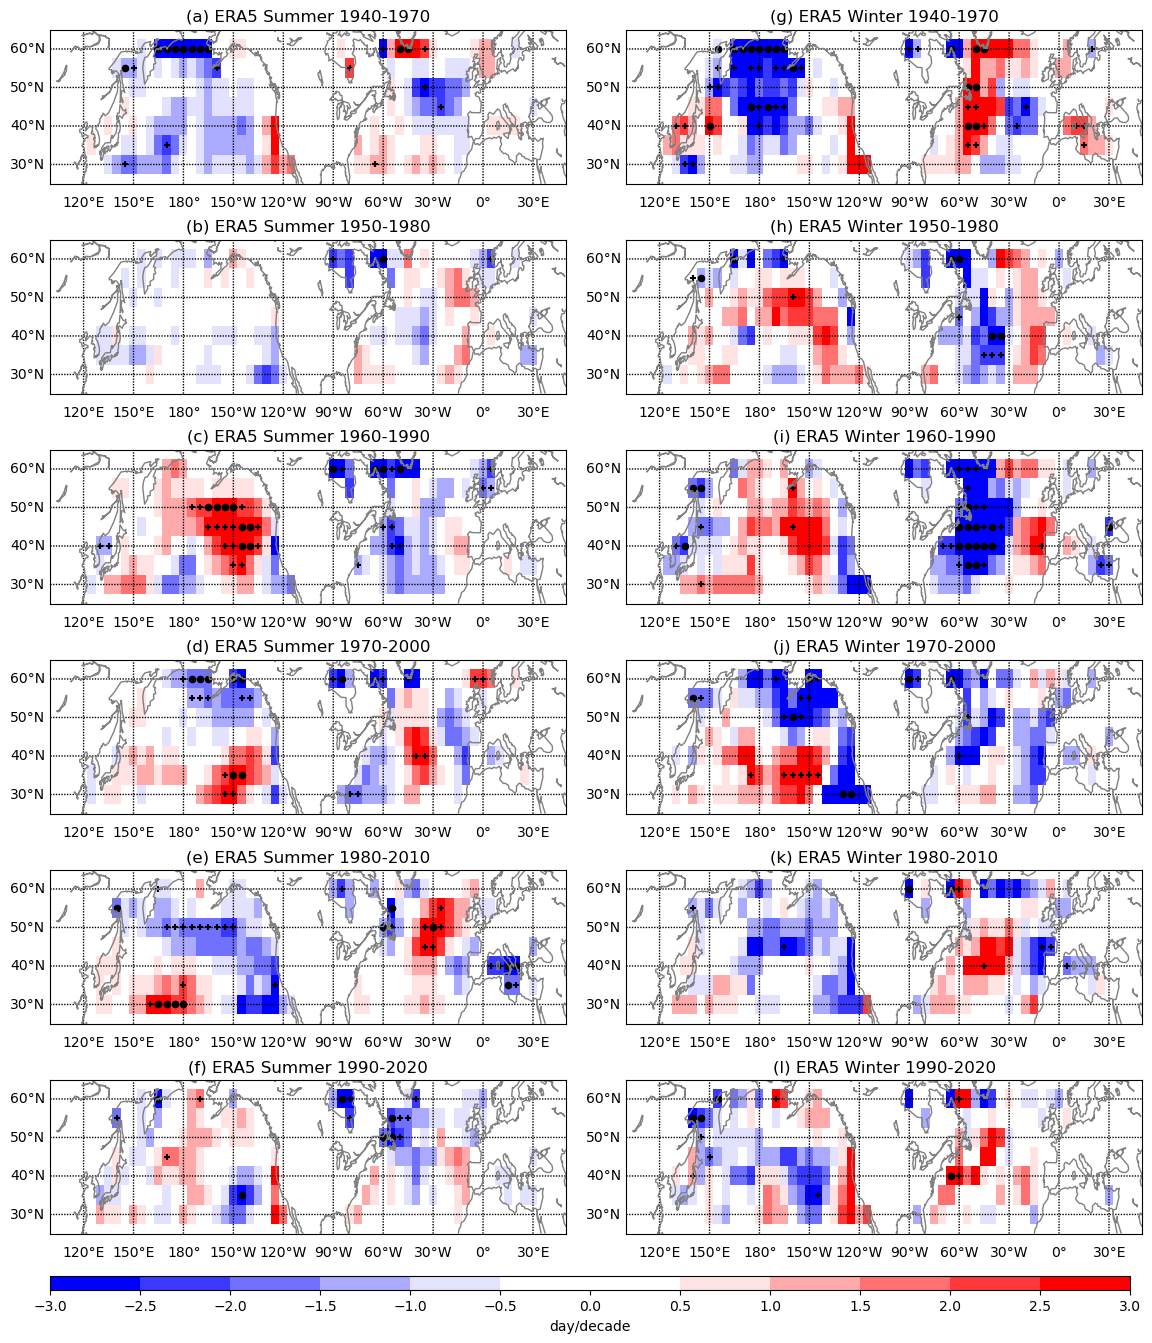

In [38]:
#lev1 = np.hstack((np.arange(-.8,-.1,.1),np.arange(.2,.9,.1)))
lev1 = np.arange(-3.0,3.5,.5)
cmap = cm.get_cmap('bwr',10)
colors_cool = cmap(np.arange(0,10,1))
#colors_all = colors_cool
colors_all = np.vstack((colors_cool[0:5,:],[1.,1.,1.,1.],[1.,1.,1.,1.], \
                        colors_cool[5:10,:]))
cmap_merged = mcolors.ListedColormap(colors_all)
cmap_merged.set_bad('white',1.)
plt_pos=np.zeros((12,4))
plt_pos[0:6,0]=.05
plt_pos[6:12,0]=.53
plt_pos[0:6,1]=np.arange(.85,0,-.15)
plt_pos[6:12,1]=np.arange(.85,0,-.15)
plt_pos[:,2]=.43
plt_pos[:,3]=.11
title_str=['(a) ERA5 Summer 1940-1970','(b) ERA5 Summer 1950-1980', \
           '(c) ERA5 Summer 1960-1990','(d) ERA5 Summer 1970-2000', \
           '(e) ERA5 Summer 1980-2010','(f) ERA5 Summer 1990-2020', \
           '(g) ERA5 Winter 1940-1970','(h) ERA5 Winter 1950-1980', \
           '(i) ERA5 Winter 1960-1990','(j) ERA5 Winter 1970-2000', \
           '(k) ERA5 Winter 1980-2010','(l) ERA5 Winter 1990-2020']

fig2 = plt.figure(figsize=[12,14])

for m in range(0,6):

    ax1 = plt.axes(plt_pos[m,:])
    as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
    as1.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)
    as1.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1], fontsize=10)
    as1.drawcoastlines(linewidth=1.0,color='grey')
    extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
    cf1 = ax1.imshow(10*np.transpose(trd_ps[:,:,0,m]),extent=extent,
                     vmin=-3.0,vmax=3.0,cmap=cmap_merged,aspect='auto')
    plt.scatter(test05[:,0,m,0],test05[:,0,m,1],s=20,c='k',marker='+')
    plt.scatter(test01[:,0,m,0],test01[:,0,m,1],s=20,c='k',marker='o')
    plt.title(title_str[m])
    
for m in range(6,12):

    ax1 = plt.axes(plt_pos[m,:])
    as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
    as1.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)
    as1.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1], fontsize=10)
    as1.drawcoastlines(linewidth=1.0,color='grey')
    extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
    cf1 = ax1.imshow(10*np.transpose(trd_ps[:,:,1,m-6]),extent=extent,
                     vmin=-3.0,vmax=3.0,cmap=cmap_merged,aspect='auto')
    plt.scatter(test05[:,1,m-6,0],test05[:,1,m-6,1],s=20,c='k',marker='+')
    plt.scatter(test01[:,1,m-6,0],test01[:,1,m-6,1],s=20,c='k',marker='o')
    plt.title(title_str[m])

clb_pos = fig2.add_axes([.05, .06, .9, .01])
cb = fig2.colorbar(cf1,cax=clb_pos,orientation='horizontal', \
                   ticks=lev1,label='day/decade')
#fig2.suptitle('Trend of SST Phase 1959-2021')

plt.show()
fig2.savefig('trd_era_decades.eps',dpi=200)

In [39]:
data = scio.loadmat('./trd_had_decades.mat')
trd_ps = data['trd_ps'][:]
test05 = data['test05'][:]
test01 = data['test01'][:]
lon = data['lon'][:]
lat = data['lat'][:]

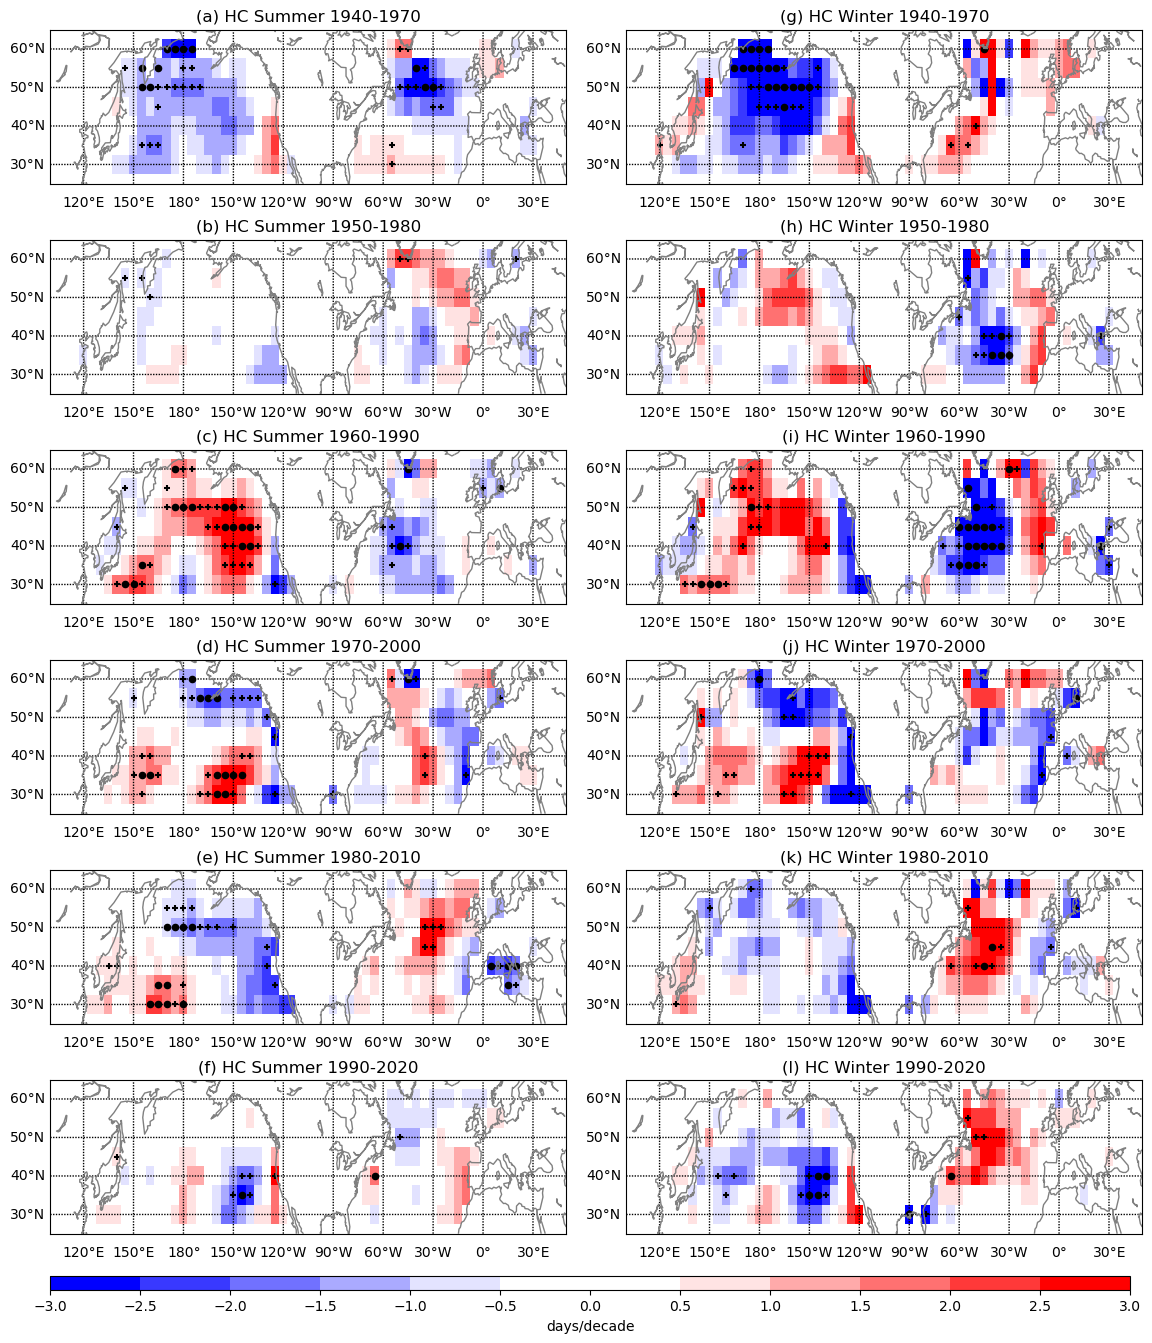

In [40]:
#lev1 = np.hstack((np.arange(-.8,-.1,.1),np.arange(.2,.9,.1)))
lev1 = np.arange(-3.0,3.5,.5)
cmap = cm.get_cmap('bwr',10)
colors_cool = cmap(np.arange(0,10,1))
#colors_all = colors_cool
colors_all = np.vstack((colors_cool[0:5,:],[1.,1.,1.,1.],[1.,1.,1.,1.], \
                        colors_cool[5:10,:]))
cmap_merged = mcolors.ListedColormap(colors_all)
cmap_merged.set_bad('white',1.)
plt_pos=np.zeros((12,4))
plt_pos[0:6,0]=.05
plt_pos[6:12,0]=.53
plt_pos[0:6,1]=np.arange(.85,0,-.15)
plt_pos[6:12,1]=np.arange(.85,0,-.15)
plt_pos[:,2]=.43
plt_pos[:,3]=.11
title_str=['(a) HC Summer 1940-1970','(b) HC Summer 1950-1980', \
           '(c) HC Summer 1960-1990','(d) HC Summer 1970-2000', \
           '(e) HC Summer 1980-2010','(f) HC Summer 1990-2020', \
           '(g) HC Winter 1940-1970','(h) HC Winter 1950-1980', \
           '(i) HC Winter 1960-1990','(j) HC Winter 1970-2000', \
           '(k) HC Winter 1980-2010','(l) HC Winter 1990-2020']

fig2 = plt.figure(figsize=[12,14])

for m in range(0,6):

    ax1 = plt.axes(plt_pos[m,:])
    as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
    as1.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)
    as1.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1], fontsize=10)
    as1.drawcoastlines(linewidth=1.0,color='grey')
    extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
    cf1 = ax1.imshow(10*np.transpose(trd_ps[:,:,0,m]),extent=extent,
                     vmin=-3.0,vmax=3.0,cmap=cmap_merged,aspect='auto')
    plt.scatter(test05[:,0,m,0],test05[:,0,m,1],s=20,c='k',marker='+')
    plt.scatter(test01[:,0,m,0],test01[:,0,m,1],s=20,c='k',marker='o')
    plt.title(title_str[m])
    
for m in range(6,12):

    ax1 = plt.axes(plt_pos[m,:])
    as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
    as1.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)
    as1.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1], fontsize=10)
    as1.drawcoastlines(linewidth=1.0,color='grey')
    extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
    cf1 = ax1.imshow(10*np.transpose(trd_ps[:,:,1,m-6]),extent=extent,
                     vmin=-3.0,vmax=3.0,cmap=cmap_merged,aspect='auto')
    plt.scatter(test05[:,1,m-6,0],test05[:,1,m-6,1],s=20,c='k',marker='+')
    plt.scatter(test01[:,1,m-6,0],test01[:,1,m-6,1],s=20,c='k',marker='o')
    plt.title(title_str[m])

clb_pos = fig2.add_axes([.05, .06, .9, .01])
cb = fig2.colorbar(cf1,cax=clb_pos,orientation='horizontal', \
                   ticks=lev1,label='days/decade')
#fig2.suptitle('Trend of SST Phase 1959-2021')

plt.show()
fig2.savefig('trd_had_decades.eps',dpi=200)

# SST anomaly&Phase

### F

In [22]:
data = scio.loadmat('./a.mat')
trd_ps = data['trd_ps'][:]
test05 = data['test05'][:]
test01 = data['test01'][:]
lon = data['lon'][:]
lat = data['lat'][:]

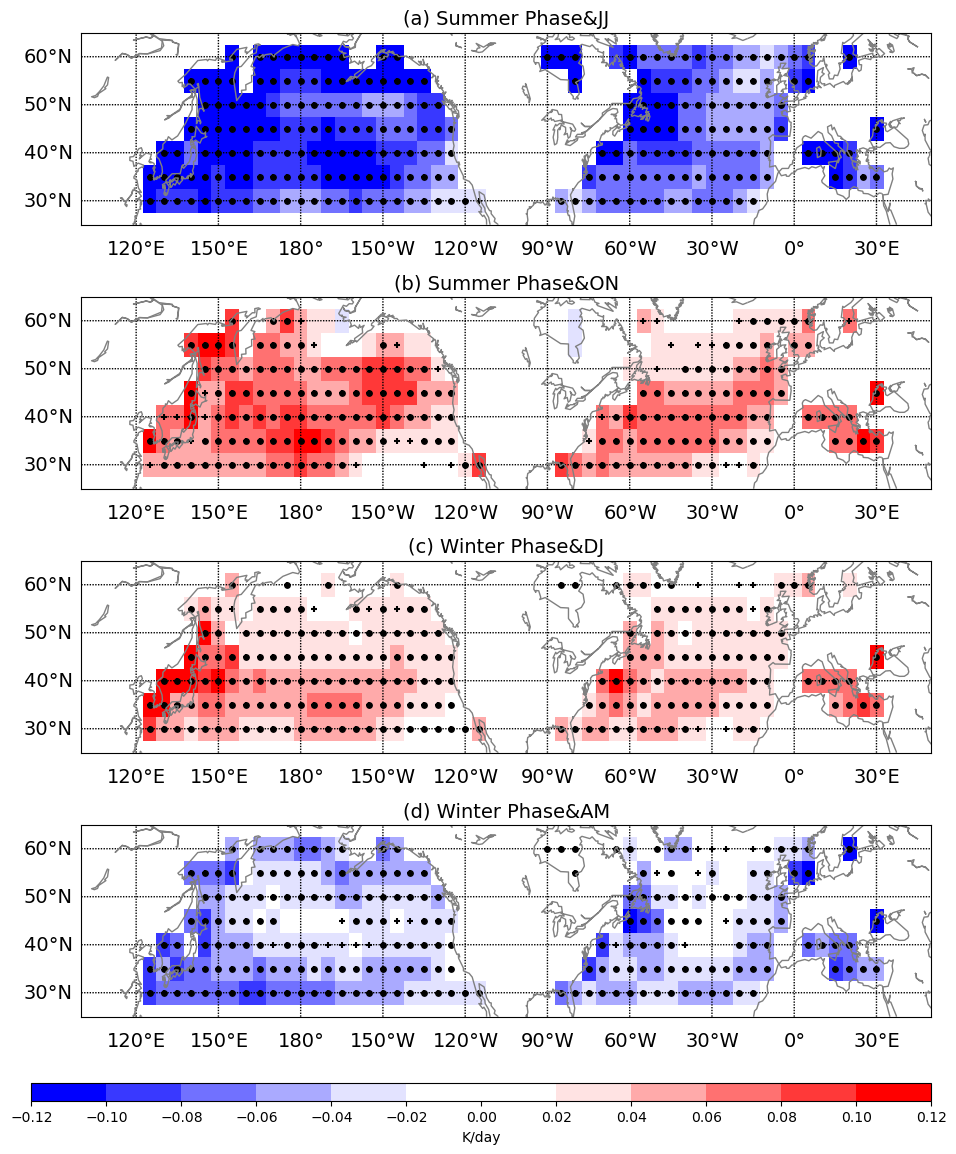

In [24]:
#lev1 = np.hstack((np.arange(-.8,-.1,.1),np.arange(.2,.9,.1)))
lev1 = np.arange(-.12,.14,.02)
cmap = cm.get_cmap('bwr',10)
colors_cool = cmap(np.arange(0,10,1))
#colors_all = colors_cool
colors_all = np.vstack((colors_cool[0:5,:],[1.,1.,1.,1.],[1.,1.,1.,1.], \
                        colors_cool[5:10,:]))
cmap_merged = mcolors.ListedColormap(colors_all)
cmap_merged.set_bad('white',1.)
plt_pos=np.zeros((4,4))
plt_pos[0:2,0]=.1
plt_pos[2:4,0]=.1
plt_pos[0:4,1]=np.arange(.8,0,-.22)
plt_pos[:,2]=.85
plt_pos[:,3]=.16
title_str=['(a) Summer Phase&JJ','(b) Summer Phase&ON', \
           '(c) Winter Phase&DJ','(d) Winter Phase&AM']

fig2 = plt.figure(figsize=[10,12])

for m in range(0,2):

    ax1 = plt.axes(plt_pos[m,:])
    as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
    as1.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=14)
    as1.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1], fontsize=14)
    as1.drawcoastlines(linewidth=1.0,color='grey')
    extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
    cf1 = ax1.imshow(np.transpose(trd_ps[:,:,m,0]),extent=extent,
                     vmin=-.12,vmax=.12,cmap=cmap_merged,aspect='auto')
    plt.scatter(test05[:,m,0,0],test05[:,m,0,1],s=15,c='k',marker='+')
    plt.scatter(test01[:,m,0,0],test01[:,m,0,1],s=15,c='k',marker='o')
    plt.title(title_str[m],fontsize=14)
    
for m in range(2,4):

    ax1 = plt.axes(plt_pos[m,:])
    as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
    as1.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=14)
    as1.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1], fontsize=14)
    as1.drawcoastlines(linewidth=1.0,color='grey')
    extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
    cf1 = ax1.imshow(np.transpose(trd_ps[:,:,m-2,1]),extent=extent,
                     vmin=-.12,vmax=.12,cmap=cmap_merged,aspect='auto')
    plt.scatter(test05[:,m-2,1,0],test05[:,m-2,1,1],s=15,c='k',marker='+')
    plt.scatter(test01[:,m-2,1,0],test01[:,m-2,1,1],s=15,c='k',marker='o')
    plt.title(title_str[m],fontsize=14)

clb_pos = fig2.add_axes([.05, .07, .9, .015])
cb = fig2.colorbar(cf1,cax=clb_pos,orientation='horizontal', \
                   ticks=lev1,label='K/day')
#fig2.suptitle('Trend of SST Phase 1959-2021')

plt.show()
fig2.savefig('reg_anm_ps.eps',dpi=200)

### S

In [47]:
data = scio.loadmat('./corr_ps_tmp_2.mat')
corr_ps = data['corr_ps'][:]
test05 = data['test05'][:]
test01 = data['test01'][:]
lon = data['lon'][:]
lat = data['lat'][:]

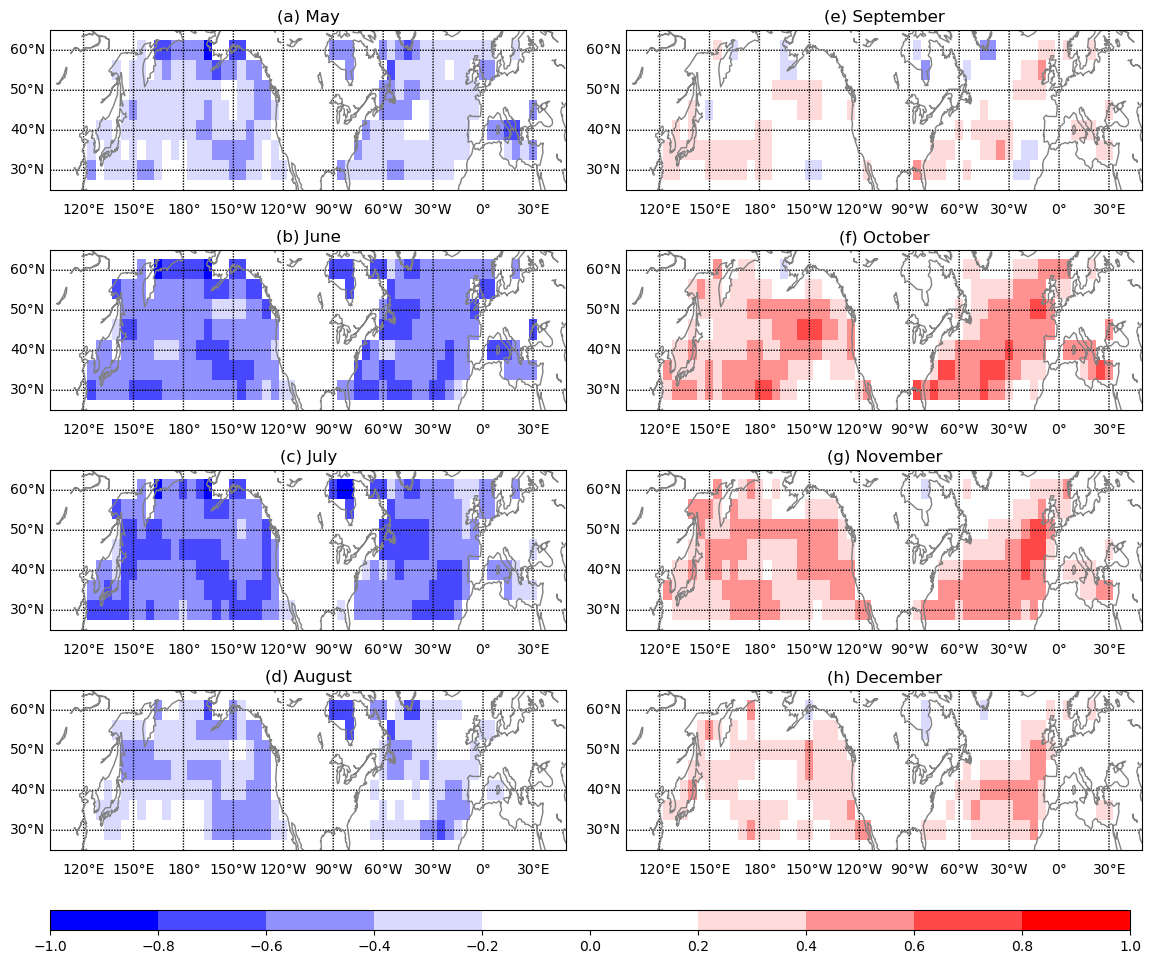

In [48]:
#lev1 = np.hstack((np.arange(-.8,-.1,.1),np.arange(.2,.9,.1)))
lev1 = np.arange(-1.0,1.2,.2)
cmap = cm.get_cmap('bwr',8)
colors_cool = cmap(np.arange(0,8,1))
#colors_all = colors_cool
colors_all = np.vstack((colors_cool[0:4,:],[1.,1.,1.,1.],[1.,1.,1.,1.], \
                        colors_cool[4:8,:]))
cmap_merged = mcolors.ListedColormap(colors_all)
cmap_merged.set_bad('white',1.)
plt_pos=np.zeros((8,4))
plt_pos[0:4,0]=.05
plt_pos[4:8,0]=.53
plt_pos[0:4,1]=np.arange(.78,0,-.22)
plt_pos[4:8,1]=np.arange(.78,0,-.22)
plt_pos[:,2]=.43
plt_pos[:,3]=.16
title_str=['(a) May','(b) June','(c) July','(d) August', \
           '(e) September','(f) October','(g) November','(h) December',]

fig2 = plt.figure(figsize=[12,10])

for m in range(0,8):

    ax1 = plt.axes(plt_pos[m,:])
    as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
    as1.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)
    as1.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1], fontsize=10)
    as1.drawcoastlines(linewidth=1.0,color='grey')
    extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
    cf1 = ax1.imshow(np.transpose(corr_ps[:,:,m,0]),extent=extent,
                     vmin=-1.0,vmax=1.0,cmap=cmap_merged,aspect='auto')
    #plt.scatter(test05[:,m,0,0],test05[:,m,0,1],s=15,c='k',marker='+')
    #plt.scatter(test01[:,m,0,0],test01[:,m,0,1],s=15,c='k',marker='o')
    plt.title(title_str[m])

clb_pos = fig2.add_axes([.05, .04, .9, .02])
cb = fig2.colorbar(cf1,cax=clb_pos,orientation='horizontal', \
                   ticks=lev1,label='')
#fig2.suptitle('Trend of SST Phase 1959-2021')

plt.show()
fig2.savefig('corr_ps_tmp_summer.eps',dpi=200)

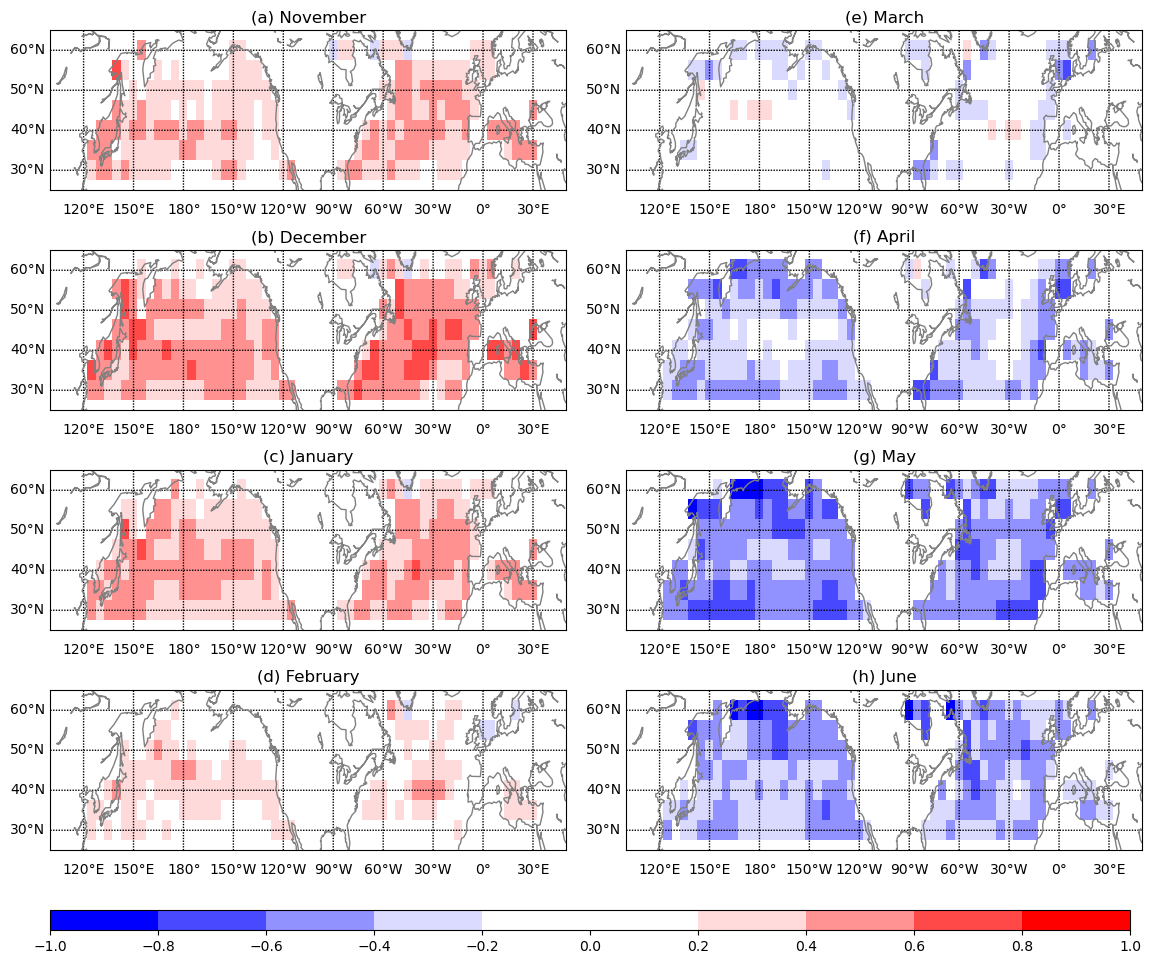

In [49]:
#lev1 = np.hstack((np.arange(-.8,-.1,.1),np.arange(.2,.9,.1)))
lev1 = np.arange(-1.0,1.2,.2)
cmap = cm.get_cmap('bwr',8)
colors_cool = cmap(np.arange(0,8,1))
#colors_all = colors_cool
colors_all = np.vstack((colors_cool[0:4,:],[1.,1.,1.,1.],[1.,1.,1.,1.], \
                        colors_cool[4:8,:]))
cmap_merged = mcolors.ListedColormap(colors_all)
cmap_merged.set_bad('white',1.)
plt_pos=np.zeros((8,4))
plt_pos[0:4,0]=.05
plt_pos[4:8,0]=.53
plt_pos[0:4,1]=np.arange(.78,0,-.22)
plt_pos[4:8,1]=np.arange(.78,0,-.22)
plt_pos[:,2]=.43
plt_pos[:,3]=.16
title_str=['(a) November','(b) December','(c) January','(d) February', \
           '(e) March','(f) April','(g) May','(h) June',]

fig2 = plt.figure(figsize=[12,10])

for m in range(0,8):

    ax1 = plt.axes(plt_pos[m,:])
    as1 = bmp(llcrnrlon=100,llcrnrlat=25,urcrnrlon=410,urcrnrlat=65,fix_aspect=False)
    as1.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)
    as1.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1], fontsize=10)
    as1.drawcoastlines(linewidth=1.0,color='grey')
    extent = [lon[0,0]-2.5,lon[-1,0]+2.5,lat[-1,0]-2.5,lat[0,0]+2.5]
    cf1 = ax1.imshow(np.transpose(corr_ps[:,:,m,1]),extent=extent,
                     vmin=-1.0,vmax=1.0,cmap=cmap_merged,aspect='auto')
    #plt.scatter(test05[:,m,1,0],test05[:,m,1,1],s=15,c='k',marker='+')
    #plt.scatter(test01[:,m,1,0],test01[:,m,1,1],s=15,c='k',marker='o')
    plt.title(title_str[m])

clb_pos = fig2.add_axes([.05, .04, .9, .02])
cb = fig2.colorbar(cf1,cax=clb_pos,orientation='horizontal', \
                   ticks=lev1,label='')
#fig2.suptitle('Trend of SST Phase 1959-2021')

plt.show()
fig2.savefig('corr_ps_tmp_winter.eps',dpi=200)